In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [5]:
pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [7]:
 data= pd.read_csv('C:\\Users\\CYBER-TECH\\Downloads\\data.csv')

In [9]:
df= data.copy()

In [11]:
 # Remove unnecessary columns
df= df.drop(['id', 'Unnamed: 32'], axis=1)

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [19]:
df.duplicated().sum()

0

In [21]:
df.shape

(569, 31)

In [23]:
# Convert diagnosis column to numeric values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [25]:
y=df['diagnosis'].values
print(np.unique(y))

[0 1]


In [27]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [29]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


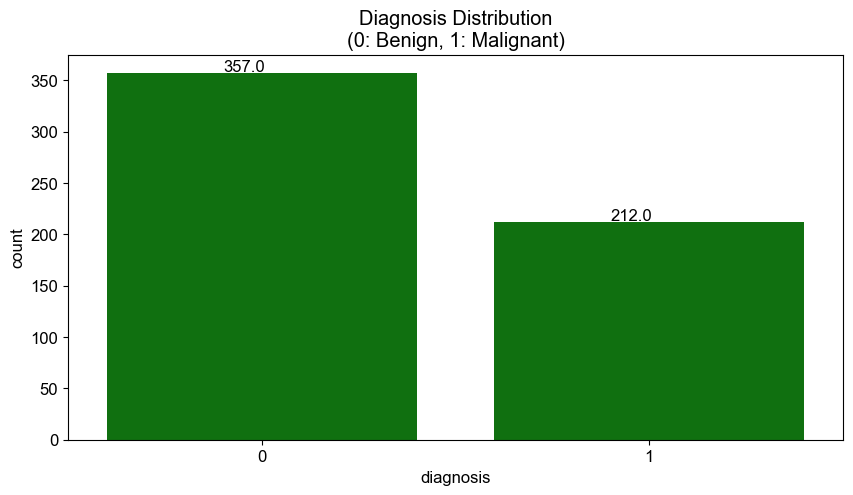

In [31]:
# Target Variable Analysis
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='diagnosis', data=df, color='g')
plt.title('Diagnosis Distribution\n(0: Benign, 1: Malignant)')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 2))

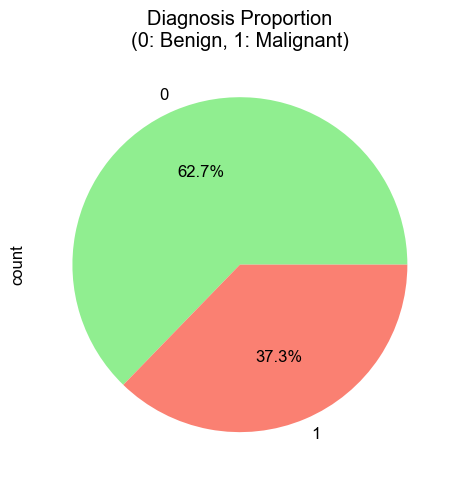

In [33]:
plt.figure(figsize=(10, 5))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Diagnosis Proportion\n(0: Benign, 1: Malignant)')
plt.tight_layout()
plt.show()

In [35]:
numerical_cols = df.select_dtypes(include=['float64']).columns.tolist()
numerical_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [37]:
top_features = df.corr()['diagnosis'].abs().sort_values(ascending=False).index[1:6]
print("\n=== Top Features Analysis ===")
print(f"Top 5 features correlated with diagnosis: {list(top_features)}")


=== Top Features Analysis ===
Top 5 features correlated with diagnosis: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean']



=== Feature Distributions ===


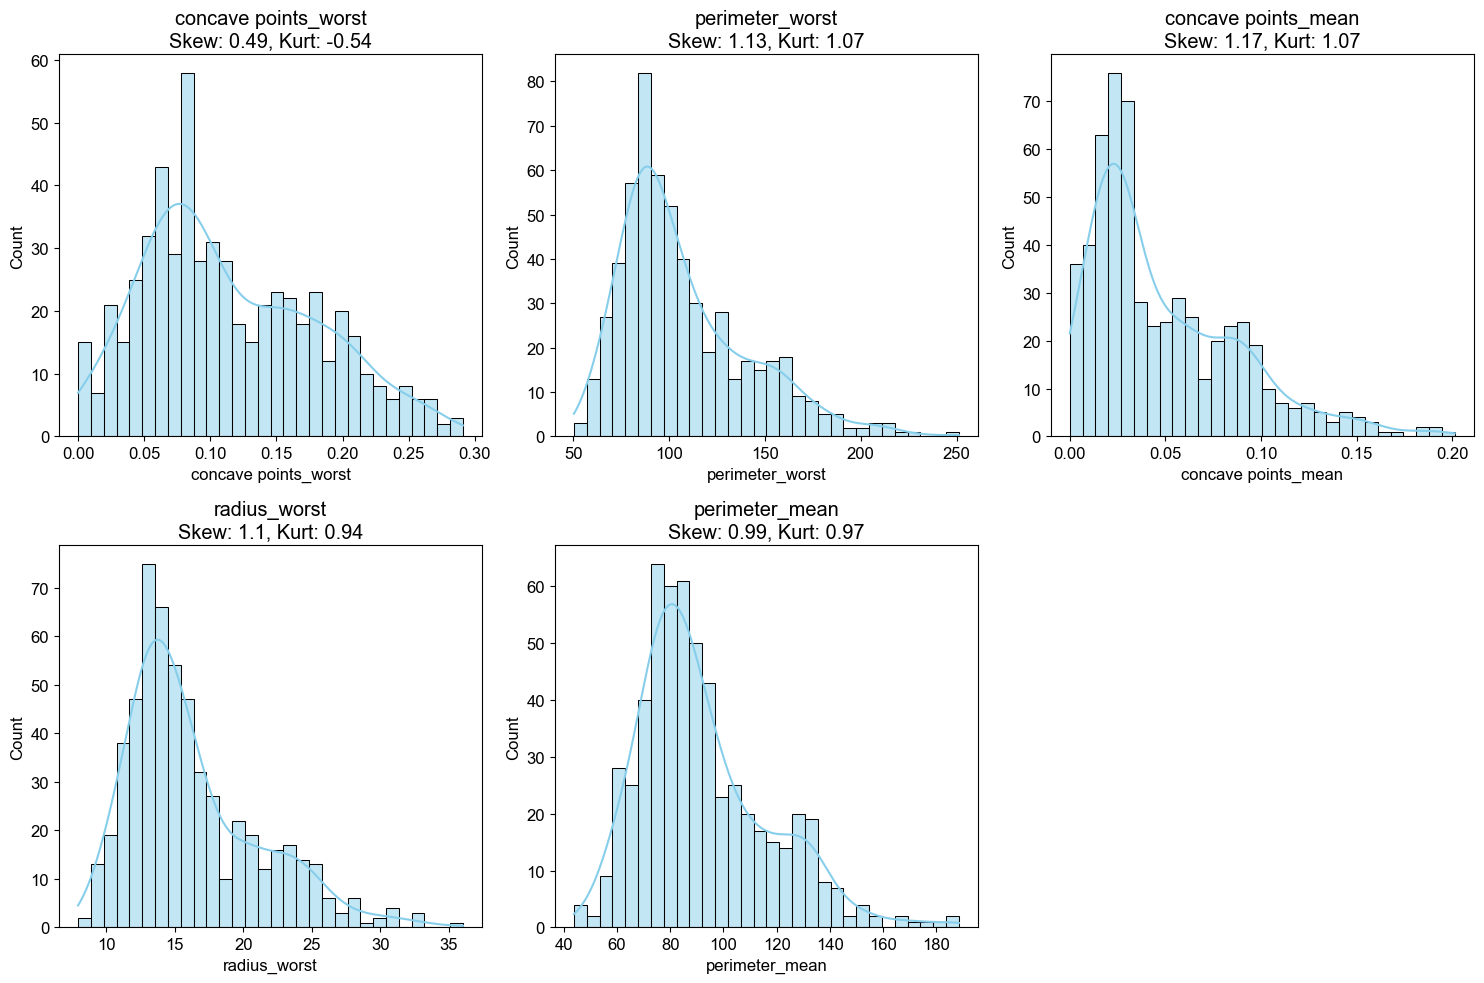

In [39]:
# Distribution plots with skewness and kurtosis
print("\n=== Feature Distributions ===")
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    skewness = df[col].skew().round(2)
    kurt = df[col].kurtosis().round(2)
    plt.title(f'{col}\nSkew: {skewness}, Kurt: {kurt}')
plt.tight_layout()
plt.show()

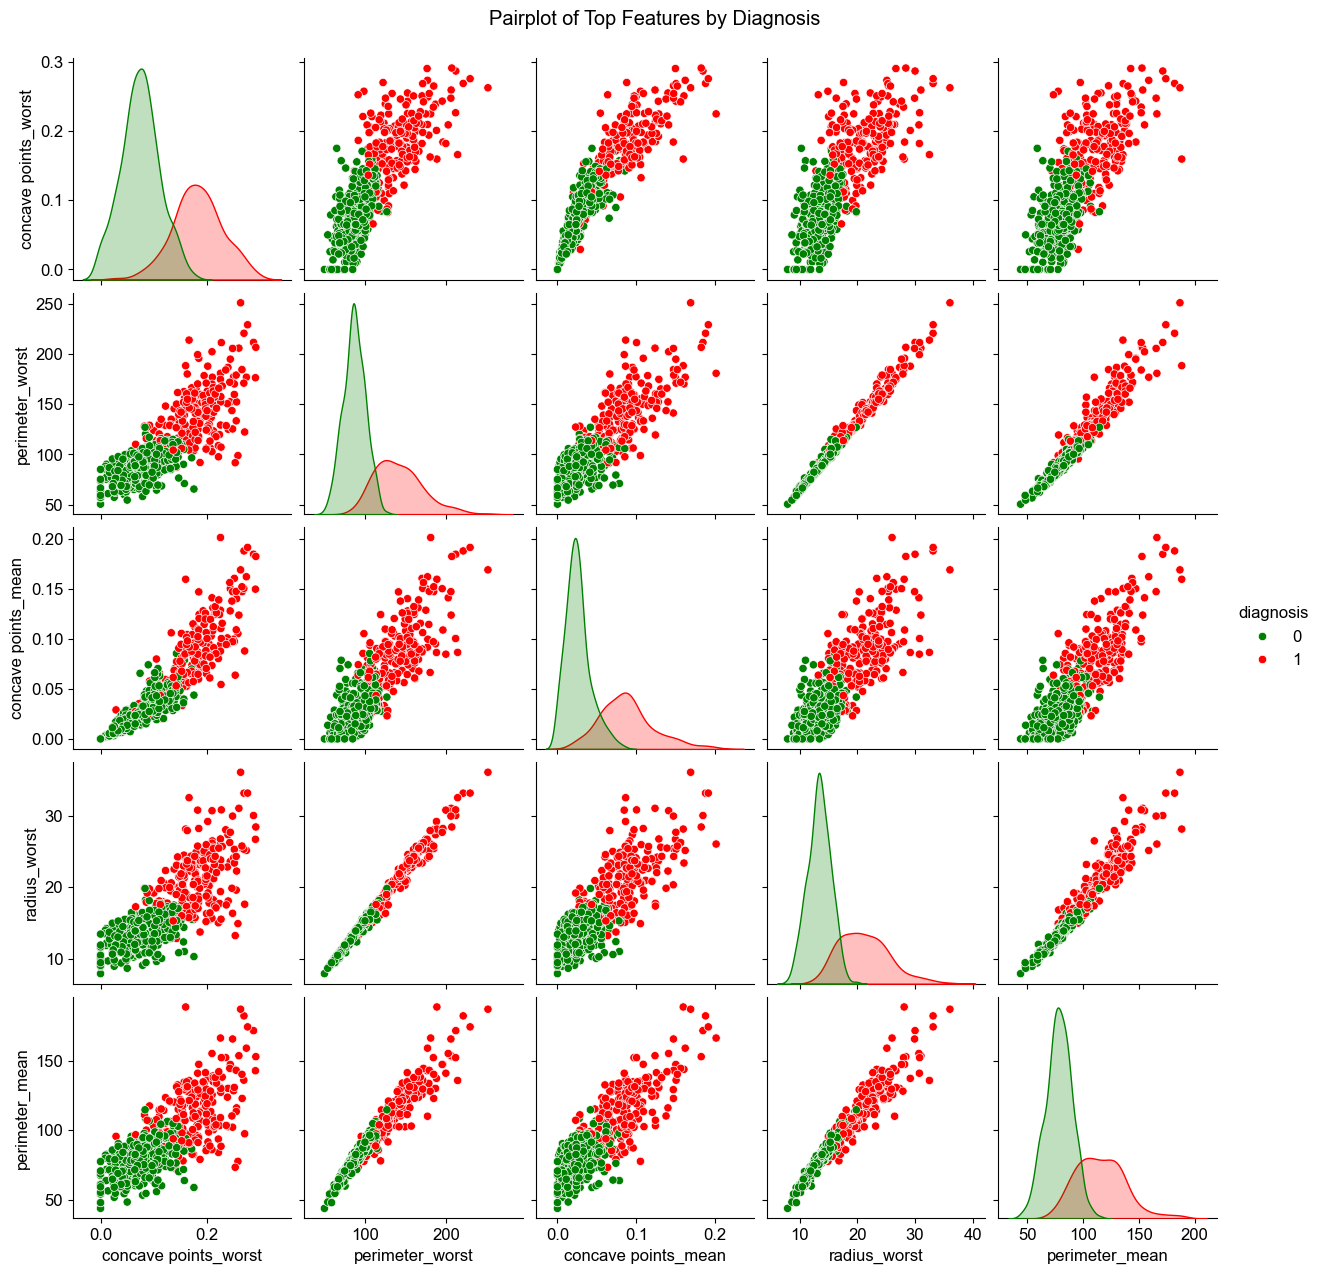

In [41]:
# Pairplot for top features
sns.pairplot(df[list(top_features) + ['diagnosis']], hue='diagnosis',
            palette={0: 'green', 1: 'red'})
plt.suptitle('Pairplot of Top Features by Diagnosis', y=1.02)
plt.show()

C:\Users\CYBER-TECH\AppData\Local\Temp\ipykernel_14564\1514930669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=col, data=df, palette='coolwarm')
C:\Users\CYBER-TECH\AppData\Local\Temp\ipykernel_14564\1514930669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=col, data=df, palette='coolwarm')
C:\Users\CYBER-TECH\AppData\Local\Temp\ipykernel_14564\1514930669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=col, data=df, palette='coolwarm')


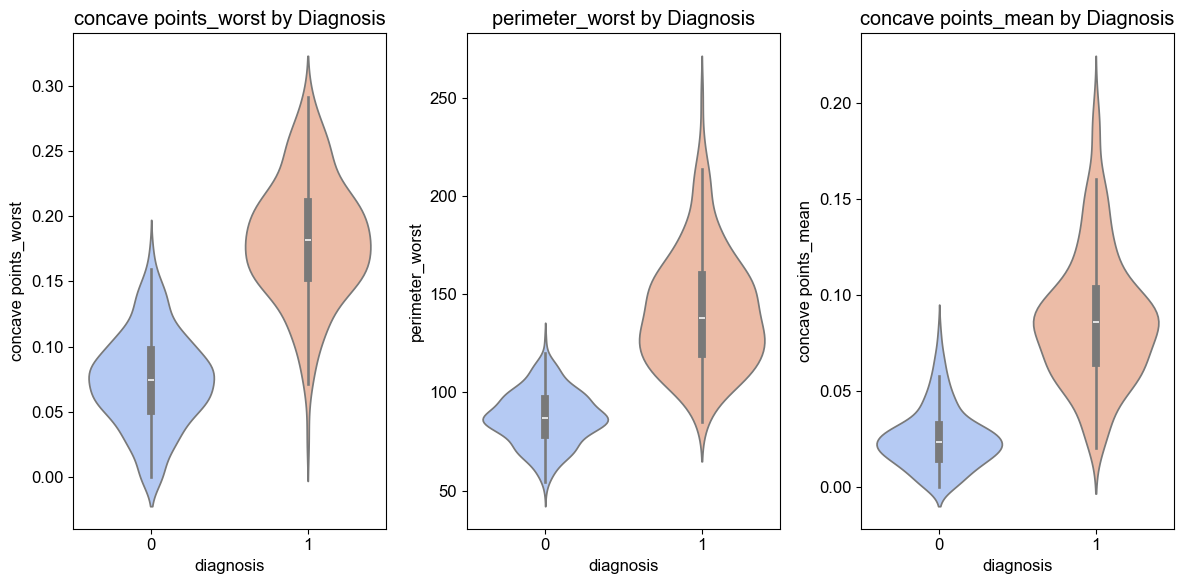

In [42]:
# Violin plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(top_features[:3], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='diagnosis', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} by Diagnosis')
plt.tight_layout()
plt.show()

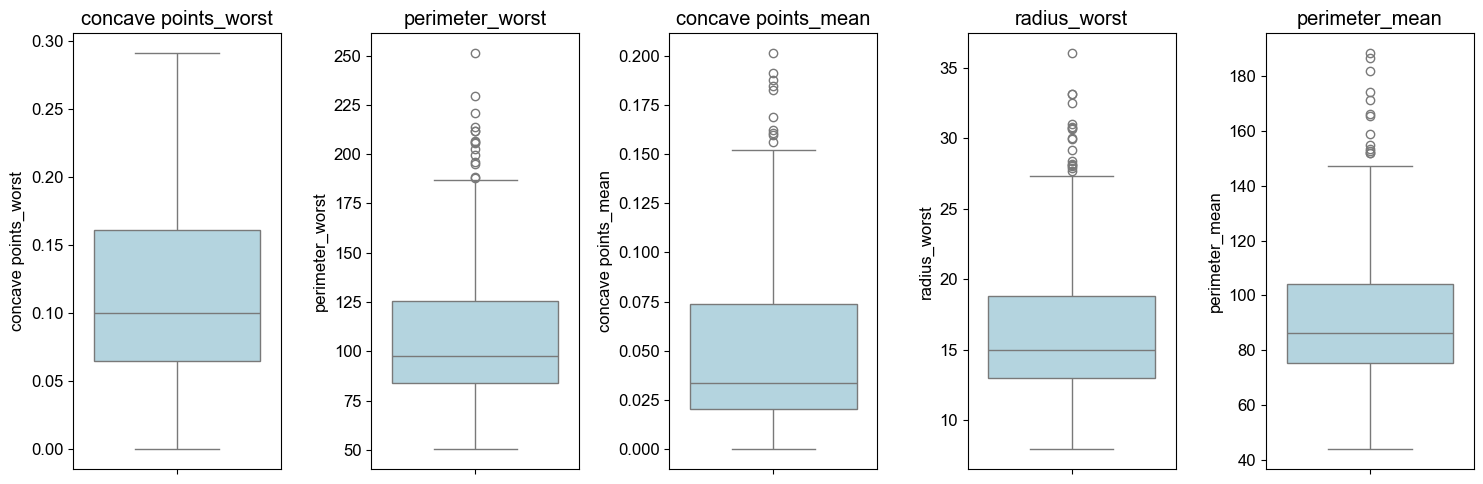

In [45]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(top_features, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [47]:
import scipy.stats as stats # Import the stats module from scipy

print("\n=== Statistical Tests ===")
benign = df[df['diagnosis'] == 0]
malignant = df[df['diagnosis'] == 1]
for col in top_features:
    t_stat, p_val = stats.ttest_ind(benign[col], malignant[col])
    print(f"{col}: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("→ Significant difference between groups (p < 0.05)")
    else:
        print("→ No significant difference between groups")
    print("-"*50)


=== Statistical Tests ===
concave points_worst: t-statistic = -31.05, p-value = 0.0000
→ Significant difference between groups (p < 0.05)
--------------------------------------------------
perimeter_worst: t-statistic = -29.97, p-value = 0.0000
→ Significant difference between groups (p < 0.05)
--------------------------------------------------
concave points_mean: t-statistic = -29.35, p-value = 0.0000
→ Significant difference between groups (p < 0.05)
--------------------------------------------------
radius_worst: t-statistic = -29.34, p-value = 0.0000
→ Significant difference between groups (p < 0.05)
--------------------------------------------------
perimeter_mean: t-statistic = -26.41, p-value = 0.0000
→ Significant difference between groups (p < 0.05)
--------------------------------------------------



=== Correlation Matrix ===


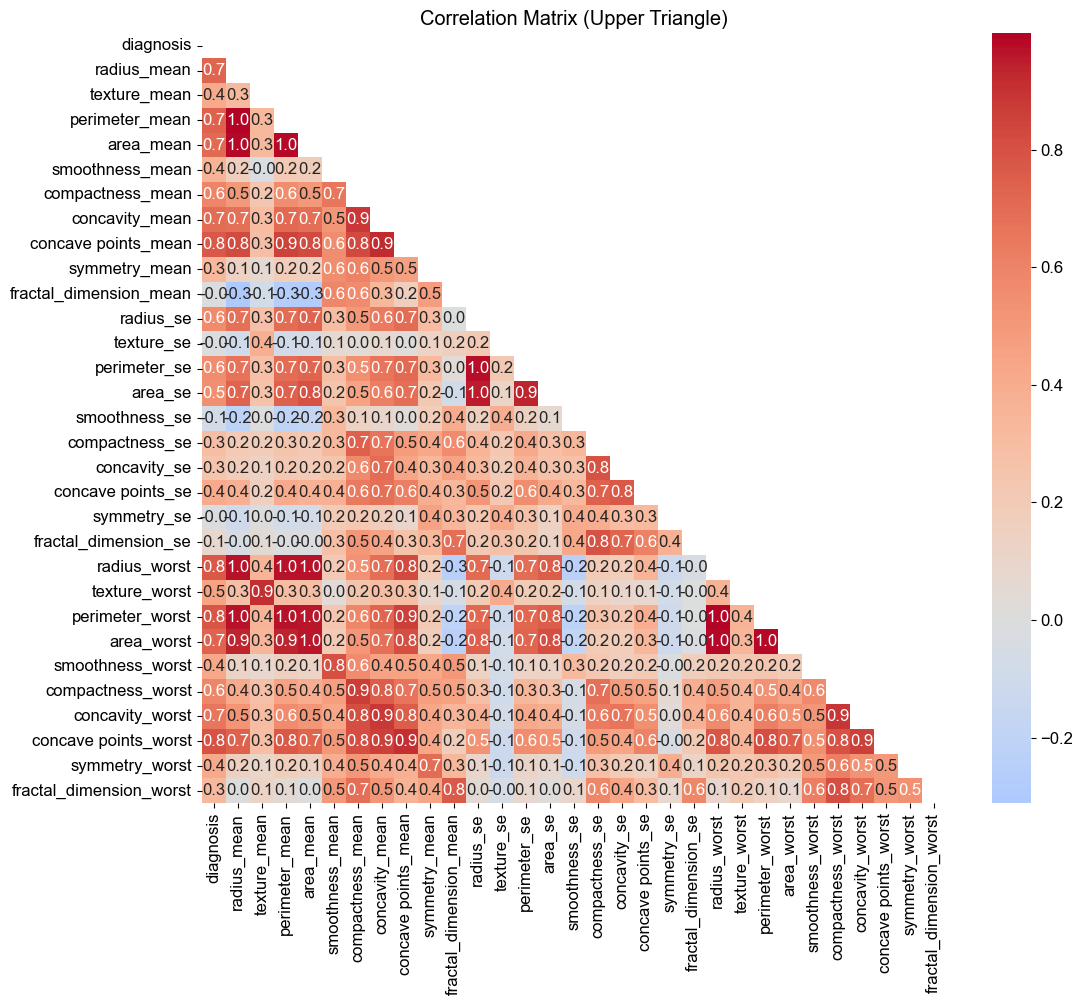

In [49]:
print("\n=== Correlation Matrix ===")
plt.figure(figsize=(12, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
           annot=True, fmt=".1f")
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

In [51]:
# Separate features from target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [53]:
# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)

In [55]:
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [57]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
model=Sequential()
model.add(Dense(16,input_dim=30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

C:\Users\CYBER-TECH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [61]:
history=model.fit(X_train, y_train,verbose=1, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6462 - loss: 0.7269 - val_accuracy: 0.7427 - val_loss: 0.5885
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7202 - loss: 0.6009 - val_accuracy: 0.7719 - val_loss: 0.4936
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7624 - loss: 0.5454 - val_accuracy: 0.8070 - val_loss: 0.4193
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8129 - loss: 0.4553 - val_accuracy: 0.8421 - val_loss: 0.3652
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8350 - loss: 0.4307 - val_accuracy: 0.8480 - val_loss: 0.3269
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8392 - loss: 0.4035 - val_accuracy: 0.8713 - val_loss: 0.2977
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8441 - loss: 0.3552 - val_accuracy: 0.8830 - val_loss: 0.2739
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8356 - loss: 0.3739 - val_accuracy: 0.9064 - val_loss:

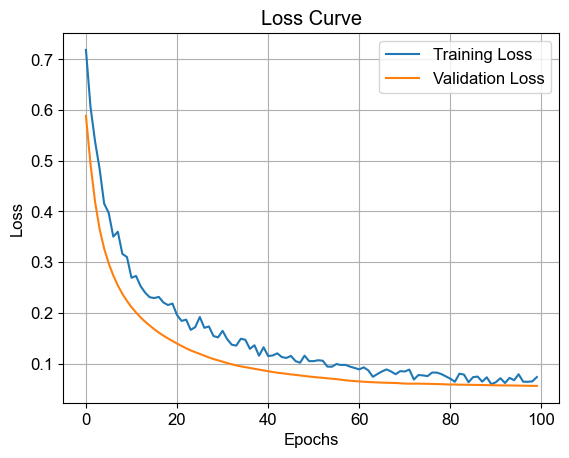

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

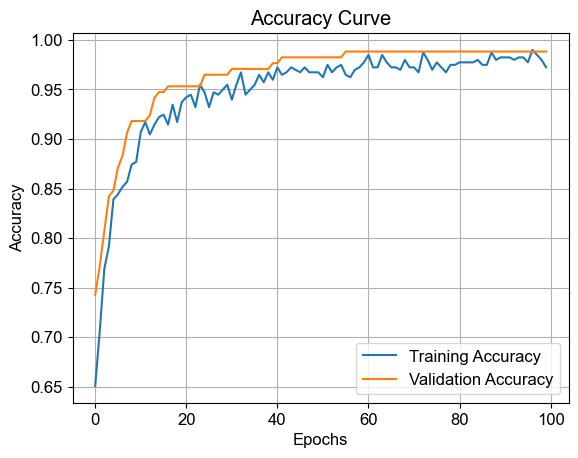

In [65]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [69]:
y_pred_classes = (y_pred > 0.5).astype(int)

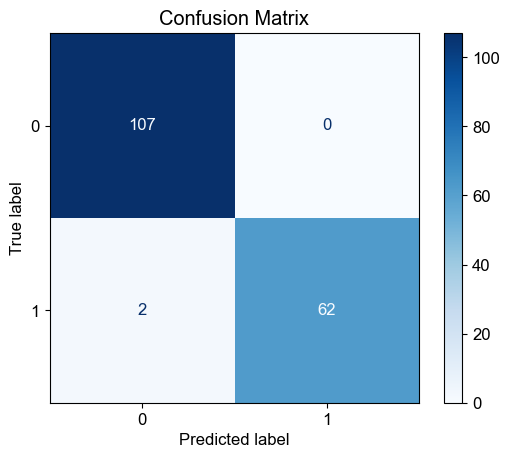

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [73]:
loss,accuracy=model.evaluate(X_test,y_test)
print(accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9856 - loss: 0.0481 
0.988304078578949


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [79]:
# Overfitting/Underfitting analysis
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

In [83]:
if final_val_loss > final_train_loss:
    print("⚠️ Possible overfitting: validation loss is higher than training loss.")
else:
    print("✅ Model seems to be well-fitted (no obvious overfitting).")

✅ Model seems to be well-fitted (no obvious overfitting).


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc
)


In [87]:
# Define SVM models with different kernels
models = {
    "Linear": SVC(kernel="linear", C=1, probability=True, random_state=42),
    "Polynomial": SVC(kernel="poly", degree=3, C=1, gamma="scale", probability=True, random_state=42),
    "RBF": SVC(kernel="rbf", C=1, gamma="scale", probability=True, random_state=42)
}

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



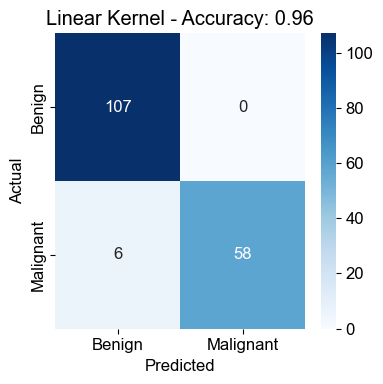

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       107
           1       1.00      0.69      0.81        64

    accuracy                           0.88       171
   macro avg       0.92      0.84      0.86       171
weighted avg       0.90      0.88      0.88       171



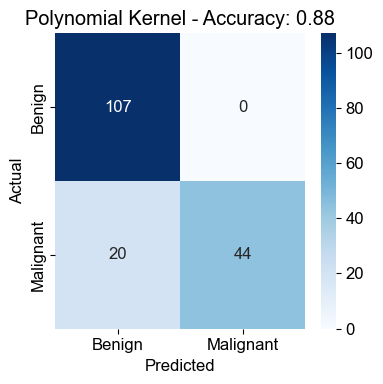

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



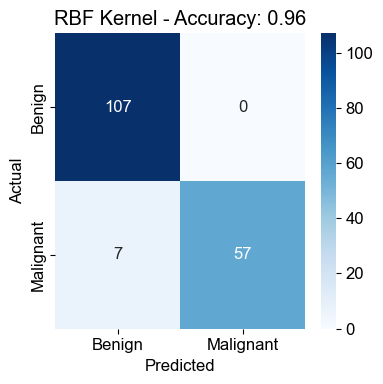

In [107]:
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Save results
    results.append({
        "Kernel": name,
        "Accuracy": acc,
        "AUC": roc_auc,
        "Confusion Matrix": cm,
        "FPR": fpr,
        "TPR": tpr
    })

    # Plot Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"])
    plt.title(f"{name} Kernel - Accuracy: {acc:.2f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



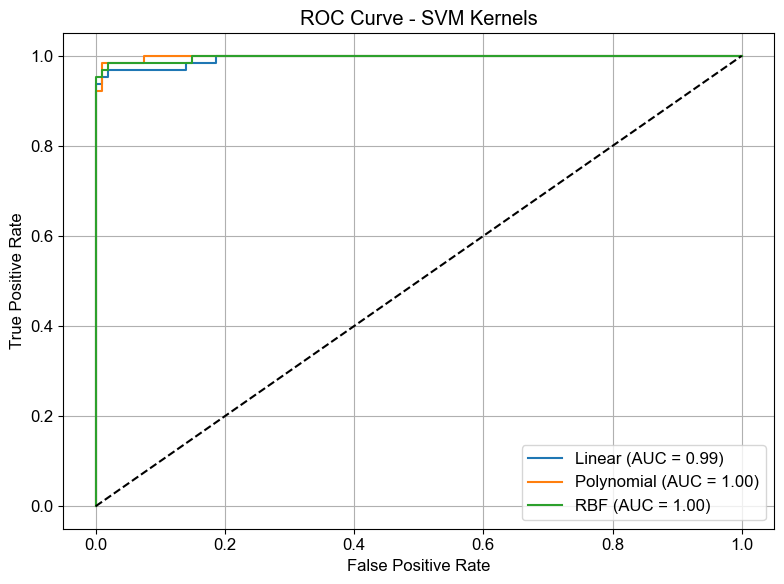

In [95]:
  plt.figure(figsize=(8, 6))

for res in results:
    plt.plot(res["FPR"], res["TPR"], label=f"{res['Kernel']} (AUC = {res['AUC']:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - SVM Kernels")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
comparison_df = pd.DataFrame([
    {"Kernel": r["Kernel"], "Accuracy": r["Accuracy"], "AUC": r["AUC"]}
    for r in results
])

# Sort and display
comparison_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)


,Kernel,Accuracy,AUC
0,Linear,0.964912,0.994451
1,RBF,0.959064,0.997225
2,Polynomial,0.883041,0.998248
